In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("/content/INM713_coursework_data_pizza_8358_1_reduced.csv")

# Check for NaN values in each column
nan_values = df.isnull().sum()
print("NaN values per column:")
print(nan_values)

# Explore the 'categories' column and extract unique category values
categories_column = df['categories']
categories = set()

# Iterate over each row in the 'categories' column
for row in categories_column:
    if isinstance(row, str):
        # Split the row by commas and add each category to the set
        row_categories = row.split(',')
        for category in row_categories:
            categories.add(category.strip())

# Print unique category values
print("Unique category values:")
for category in categories:
    print(category)


NaN values per column:
name                   0
address                0
city                   0
country                0
postcode              65
state                  0
categories             0
menu item              0
item value           562
currency             559
item description    1984
dtype: int64
Unique category values:

Cafeterias
Pizza Place Westside
Beer & Ale
Bar Grills
recreation
The-valley
Beer Garden
Expos Conventions
Seafood Markets
Bartending Service
Chinese Restaurants
neighborhood - fort-hamilton
casual dining
Restaurant Delivery Service
Arcade
Texas (tx)
American Restaurant
Dinner Theaters
and Lounge
Seafood Restaurant and Speakeasy
Breakfast Brunch & Lunch Restaurants
Caribbean Restaurants
hotels
cellular phone companies
and French Restaurant
Arts Crafts Store
Delis And Delicatessens
Designer Clothing & Accessories
Game & Entertainment Centers
Food Stores
Bagel Shop South Slope
Carry-out food
feature - Open Late
and Sushi Restaurant
Sports & Recreation
feature

In [ ]:
# Explore the 'categories' column and extract unique category values
categories_column = df['categories']
categories = []

# Iterate over each row in the 'categories' column
for row in categories_column:
    if isinstance(row, str):
        # Split the row by commas and add each category to the list
        row_categories = row.split(',')
        for category in row_categories:
            categories.append(category.strip())

# Create a pandas Series from the categories list and get the top 10 most frequent categories
top_10_categories = pd.Series(categories).value_counts().head(25)

# Print the top 10 most frequent categories
print("Top 10 most frequent categories:")
print(top_10_categories)


Top 10 most frequent categories:
Pizza Place                                   1587
Restaurants                                   1120
Restaurant                                     884
Pizza                                          827
Italian Restaurant                             551
Caterers                                       383
Italian Restaurants                            370
Take Out Restaurants                           350
American Restaurant                            339
Bar                                            184
Pizza Place and Italian Restaurant             110
Mediterranean Restaurants                       84
Sports Bar                                      83
Sandwich Shops                                  77
American Restaurants                            76
Delicatessens                                   59
American Restaurant and Italian Restaurant      55
Bars                                            53
Family Style Restaurants                        5

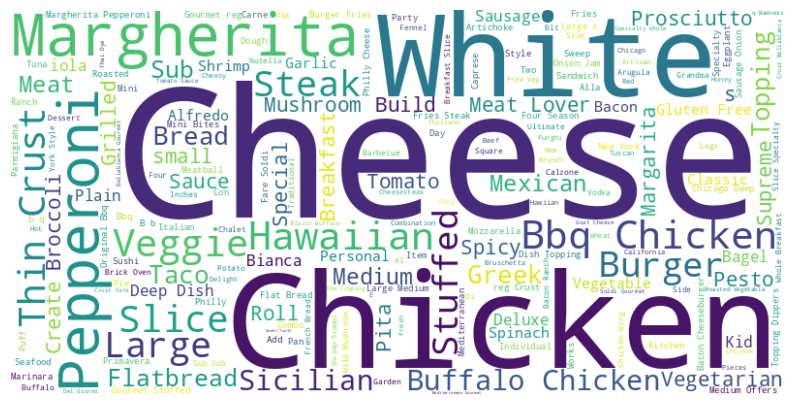

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all the menu items into a single string
menu_items = ' '.join(df['menu item'].dropna().values.tolist())
modified_text = menu_items.replace("pizza", "")
modified_text = modified_text.replace("Pizza", "")
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(modified_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from collections import Counter

text = modified_text

# Convert the string to lowercase and split it into words
words = text.lower().split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get the top 20 most common words
top_20_words = word_counts.most_common(100)

# Print the top 20 words and their counts
for word, count in top_20_words:
    print(f"{word}: {count}")


cheese: 353
chicken: 292
white: 135
margherita: 115
pepperoni: 105
bbq: 97
the: 97
crust: 80
steak: 79
thin: 78
veggie: 77
hawaiian: 75
large: 74
stuffed: 73
burger: 73
buffalo: 70
slice: 67
and: 63
meat: 61
bread: 61
sicilian: 56
your: 55
own: 53
sub: 52
topping: 51
gourmet: 45
taco: 43
s: 43
of: 41
greek: 41
flatbread: 39
fries: 38
breakfast: 37
or: 37
medium: 36
mexican: 34
bacon: 33
by: 32
with: 31
special: 31
vegetarian: 30
sausage: 30
mushroom: 29
vegetable: 28
margarita: 28
philly: 28
supreme: 27
create: 26
tomato: 26
specialty: 26
pesto: 25
deep: 25
iola: 25
lovers: 25
prosciutto: 25
1: 25
broccoli: 24
sauce: 23
mini: 23
pita: 23
shrimp: 23
grilled: 23
2: 23
toppings: 22
build: 22
spicy: 22
bagel: 20
deluxe: 20
dish: 20
mediterranean: 20
any: 20
bianca: 19
con: 19
free: 19
four: 19
,: 18
spinach: 18
gluten: 18
pan: 18
roll: 17
plain: 17
chicago: 17
classic: 17
new: 17
roasted: 17
style: 16
alfredo: 16
personal: 16
ranch: 16
mozzarella: 16
(medium): 16
(small): 16
crust): 16
sli

In [ ]:
type(menu_items)

str

In [ ]:
import pandas as pd
import re


# Extract the pizza types from the 'menu item' column using regular expressions
pizza_types = df['menu item'].str.extract(r'(cheese|veggie|pepperoni|margherita|hawaiian|meat lovers|bbq chicken|supreme|buffalo chicken|greek)', flags=re.IGNORECASE)

# Assign 'Other' category to remaining pizza types
pizza_types = pizza_types.fillna('Other')

# Add the pizza type column to the DataFrame
df['pizza_type'] = pizza_types

# Count the occurrences of each pizza type
pizza_type_counts = pizza_types[0].value_counts()

# Get the top 10 pizza types
top_10_pizza_types = pizza_type_counts.head(10)

# Print the top 10 pizza types
print("Top 10 pizza types:")
print(top_10_pizza_types)

# Print the updated DataFrame with the pizza type column
print("Updated DataFrame:")
df.head(10)

Top 10 pizza types:
Other              2548
Cheese              374
Margherita          115
Pepperoni           103
Hawaiian             75
Veggie               75
Bbq Chicken          73
Buffalo Chicken      57
Greek                41
Supreme              25
Name: 0, dtype: int64
Updated DataFrame:


,name,address,city,country,postcode,state,categories,menu item,item value,currency,item description,pizza_type
0,Little Pizza Paradise,Cascade Village Mall Across From Target,Bend,US,97701,OR,Pizza Place,Bianca Pizza,22.50,USD,NaN,Other
1,Little Pizza Paradise,Cascade Village Mall Across From Target,Bend,US,97701,OR,Pizza Place,Cheese Pizza,18.95,USD,NaN,Cheese
2,The Brentwood,148 S Barrington Ave,Los Angeles,US,90049,Brentwood,"American Restaurant,Bar,Bakery","Pizza, Margherita",12.00,USD,NaN,Margherita
3,The Brentwood,148 S Barrington Ave,Los Angeles,US,90049,Brentwood,"American Restaurant,Bar,Bakery","Pizza, Mushroom",13.00,USD,NaN,Other
4,The Brentwood,148 S Barrington Ave,Los Angeles,US,90049,Brentwood,"American Restaurant,Bar,Bakery","Pizza, Puttenesca",13.00,USD,"Olives, onions, capers, tomatoes",Other
5,The Brentwood,148 S Barrington Ave,Los Angeles,US,90049,Brentwood,"American Restaurant,Bar,Bakery","Pizza, Salami Piccante",15.00,USD,NaN,Other
6,The Brentwood,148 S Barrington Ave,Los Angeles,US,90049,Brentwood,"American Restaurant,Bar,Bakery","Pizza, White Truffle Meat Sauce",15.00,USD,NaN,Other
7,Bravo Pizza Hollywood,5142 Hollywood Blvd,Los Angeles,US,90027,Los Feliz,Pizza Place,Cheese Pizza,10.99,USD,Choose a pizza size.,Cheese
8,Bravo Pizza Hollywood,5142 Hollywood Blvd,Los Angeles,US,90027,Los Feliz,Pizza Place,Hawaiian Pizza,11.99,USD,"Canadian bacon, pineapple.",Hawaiian
9,Bravo Pizza Hollywood,5142 Hollywood Blvd,Los Angeles,US,90027,Los Feliz,Pizza Place,Meat Lover Pizza,16.99,USD,NaN,Other


In [ ]:
import pandas as pd



# Define the 50 pizza types
pizza_types = ['kid','margarita','vegetarian','vegetable','nutella','italian','grilled','sandwich','seafood','sushi','vodka','buffalo','bbq','bagel','roll','fries','burger','steak','bread','sub','crust','taco','mexican','bianca','shrimp','mediterranean','cheese','meat', 'veggie', 'margherita', 'pepperoni', 'hawaiian', 'meat lovers', 'supreme', 'bbq chicken', 'buffalo chicken', 'spinach', 'mushroom', 'pesto', 'neapolitan', 'sicilian', 'white', 'greek', 'anchovy', 'sausage', 'bacon', 'ham', 'chicken', 'artichoke', 'roasted garlic', 'tomato', 'prosciutto', 'four cheese', 'barbecue', 'ranch', 'garlic', 'onion', 'green pepper', 'red pepper', 'jalapeno', 'olive', 'pineapple', 'broccoli', 'feta', 'goat cheese', 'blue cheese', 'ricotta', 'mozzarella', 'parmesan', 'romano', 'asiago', 'cheddar', 'swiss', 'gorgonzola', 'brie', 'goat']

# Function to classify pizza based on its name
def classify_pizza(pizza_name):
    for pizza_type in pizza_types:
        if pizza_type in pizza_name.lower():
              return pizza_type

    return 'other'

# Apply the classification function to the 'name' column and create a new column 'pizza_type'
df['pizza_type'] = df['menu item'].apply(classify_pizza)

# Print the updated table
df.head(10)

,name,address,city,country,postcode,state,categories,menu item,item value,currency,item description,pizza_type
0,Little Pizza Paradise,Cascade Village Mall Across From Target,Bend,US,97701,OR,Pizza Place,Bianca Pizza,22.50,USD,NaN,bianca
1,Little Pizza Paradise,Cascade Village Mall Across From Target,Bend,US,97701,OR,Pizza Place,Cheese Pizza,18.95,USD,NaN,cheese
2,The Brentwood,148 S Barrington Ave,Los Angeles,US,90049,Brentwood,"American Restaurant,Bar,Bakery","Pizza, Margherita",12.00,USD,NaN,margherita
3,The Brentwood,148 S Barrington Ave,Los Angeles,US,90049,Brentwood,"American Restaurant,Bar,Bakery","Pizza, Mushroom",13.00,USD,NaN,mushroom
4,The Brentwood,148 S Barrington Ave,Los Angeles,US,90049,Brentwood,"American Restaurant,Bar,Bakery","Pizza, Puttenesca",13.00,USD,"Olives, onions, capers, tomatoes",other
5,The Brentwood,148 S Barrington Ave,Los Angeles,US,90049,Brentwood,"American Restaurant,Bar,Bakery","Pizza, Salami Piccante",15.00,USD,NaN,other
6,The Brentwood,148 S Barrington Ave,Los Angeles,US,90049,Brentwood,"American Restaurant,Bar,Bakery","Pizza, White Truffle Meat Sauce",15.00,USD,NaN,meat
7,Bravo Pizza Hollywood,5142 Hollywood Blvd,Los Angeles,US,90027,Los Feliz,Pizza Place,Cheese Pizza,10.99,USD,Choose a pizza size.,cheese
8,Bravo Pizza Hollywood,5142 Hollywood Blvd,Los Angeles,US,90027,Los Feliz,Pizza Place,Hawaiian Pizza,11.99,USD,"Canadian bacon, pineapple.",hawaiian
9,Bravo Pizza Hollywood,5142 Hollywood Blvd,Los Angeles,US,90027,Los Feliz,Pizza Place,Meat Lover Pizza,16.99,USD,NaN,meat


In [ ]:
# Group by 'pizza_type' and count occurrences
pizza_counts = df.groupby('pizza_type').size().reset_index(name='count')

# Sort the counts in descending order
pizza_counts = pizza_counts.sort_values(by='count', ascending=False)

# Print the top 10 most repeated pizza types
pizza_counts.head(50)


,pizza_type,count
33,other,1294
10,cheese,306
60,white,117
11,chicken,111
24,margherita,107
4,bbq,95
6,bread,90
49,steak,88
9,burger,85
12,crust,82


In [ ]:
# Filter rows where pizza_type is 'other'
other_pizzas = df[df['pizza_type'] == 'other']

# Print the rows
DF=other_pizzas[['pizza_type','menu item']]
DF

,pizza_type,menu item
4,other,"Pizza, Puttenesca"
5,other,"Pizza, Salami Piccante"
13,other,Create Your Own Pizza
16,other,House Made Pizza
20,other,Pizza Con Uovo Fritto
...,...,...
3492,other,Pastis De Pizza
3497,other,The New Yorker Pizza
3498,other,Personal Pizza
3499,other,Pizza Pizza


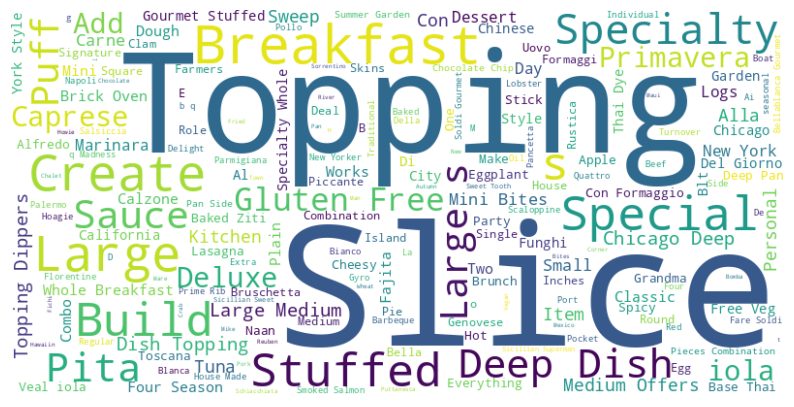

the: 75
slice: 56
your: 52
own: 52
large: 46
topping: 42
breakfast: 37
s: 37
by: 31
of: 28


In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all the menu items into a single string
menu_items = ' '.join(DF['menu item'].dropna().values.tolist())
modified_text = menu_items.replace("pizza", "")
modified_text = modified_text.replace("Pizza", "")
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(modified_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

text = modified_text

# Convert the string to lowercase and split it into words
words = text.lower().split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get the top 20 most common words
top_20_words = word_counts.most_common(10)

# Print the top 20 words and their counts
for word, count in top_20_words:
    print(f"{word}: {count}")


In [ ]:
# Update pizza_type column
# Replace values in the 'pizza_type' column
df['pizza_type'] = df['pizza_type'].replace(['vegetarian', 'vegetable'], 'veggie')
# Replace values in the 'pizza_type' column
df['pizza_type'] = df['pizza_type'].replace('margarita', 'margherita')

# Print the updated DataFrame
df.head()

,name,address,city,country,postcode,state,categories,menu item,item value,currency,item description,pizza_type
0,Little Pizza Paradise,Cascade Village Mall Across From Target,Bend,US,97701,OR,Pizza Place,Bianca Pizza,22.50,USD,NaN,bianca
1,Little Pizza Paradise,Cascade Village Mall Across From Target,Bend,US,97701,OR,Pizza Place,Cheese Pizza,18.95,USD,NaN,cheese
2,The Brentwood,148 S Barrington Ave,Los Angeles,US,90049,Brentwood,"American Restaurant,Bar,Bakery","Pizza, Margherita",12.00,USD,NaN,margherita
3,The Brentwood,148 S Barrington Ave,Los Angeles,US,90049,Brentwood,"American Restaurant,Bar,Bakery","Pizza, Mushroom",13.00,USD,NaN,mushroom
4,The Brentwood,148 S Barrington Ave,Los Angeles,US,90049,Brentwood,"American Restaurant,Bar,Bakery","Pizza, Puttenesca",13.00,USD,"Olives, onions, capers, tomatoes",other


In [ ]:
# Filter rows where pizza_type is 'other'
other_pizzas = df[df['pizza_type'] == 'other']

# Print the rows
DF=other_pizzas[['pizza_type','menu item']]
DF

,pizza_type,menu item
4,other,"Pizza, Puttenesca"
5,other,"Pizza, Salami Piccante"
13,other,Create Your Own Pizza
16,other,House Made Pizza
20,other,Pizza Con Uovo Fritto
...,...,...
3492,other,Pastis De Pizza
3497,other,The New Yorker Pizza
3498,other,Personal Pizza
3499,other,Pizza Pizza


In [ ]:
# Group by 'pizza_type' and count occurrences
pizza_counts = df.groupby('pizza_type').size().reset_index(name='count')

# Sort the counts in descending order
pizza_counts = pizza_counts.sort_values(by='count', ascending=False)

# Print the top 10 most repeated pizza types
pizza_counts.head(50)


,pizza_type,count
32,other,1294
10,cheese,306
23,margherita,135
55,veggie,131
57,white,117
11,chicken,111
4,bbq,95
6,bread,90
48,steak,88
9,burger,85


In [ ]:
!pip install requests --quiet
!pip install rdflib  --quiet
!pip install SPARQLWrapper  --quiet
!pip install Owlready2  --quiet


In [ ]:
df.head()

,name,address,city,country,postcode,state,categories,menu item,item value,currency,item description,pizza_type
0,Little Pizza Paradise,Cascade Village Mall Across From Target,Bend,US,97701,OR,Pizza Place,Bianca Pizza,22.50,USD,NaN,bianca
1,Little Pizza Paradise,Cascade Village Mall Across From Target,Bend,US,97701,OR,Pizza Place,Cheese Pizza,18.95,USD,NaN,cheese
2,The Brentwood,148 S Barrington Ave,Los Angeles,US,90049,Brentwood,"American Restaurant,Bar,Bakery","Pizza, Margherita",12.00,USD,NaN,margherita
3,The Brentwood,148 S Barrington Ave,Los Angeles,US,90049,Brentwood,"American Restaurant,Bar,Bakery","Pizza, Mushroom",13.00,USD,NaN,mushroom
4,The Brentwood,148 S Barrington Ave,Los Angeles,US,90049,Brentwood,"American Restaurant,Bar,Bakery","Pizza, Puttenesca",13.00,USD,"Olives, onions, capers, tomatoes",other


In [ ]:
df.groupby('currency').size().reset_index(name='count')

,currency,count
0,USD,2951


In [ ]:
address = df[['name', 'address']]
state = df[['city', 'state']]
country = df[['state', 'country']]
postcode = df[['name', 'postcode']]
Categories =df[['name', 'categories']]
pizza=df[['name', 'menu item']]
price=df[[ 'menu item','item value','name']]
currency=df[[ 'name','currency','menu item']]
pizza_type=df[[ 'menu item','pizza_type','name']]

In [ ]:
city = df[['name', 'city']]


In [ ]:
item_description = df[['menu item', 'item description','name']]


In [ ]:

# Define a list of the dataframes
df_list = [address, state, country,postcode,Categories,pizza,price,currency,pizza_type]


In [ ]:
import pandas as pd

# create the initial DataFrame

# split the categories column by comma and create a new DataFrame with one row for each category
split_categories = Categories['categories'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('category')
new_Categories = Categories.drop('categories', axis=1).join(split_categories)
new_Categories
# group by the name column and join the categories with commas
#final_Categories = new_Categories.groupby('name')['category'].apply(','.join).reset_index()

#final_Categories

,name,category
0,Little Pizza Paradise,Pizza Place
1,Little Pizza Paradise,Pizza Place
2,The Brentwood,American Restaurant
2,The Brentwood,Bar
2,The Brentwood,Bakery
...,...,...
3507,Moonlight Cafe,Restaurant
3507,Moonlight Cafe,Italian Restaurant
3508,Moonlight Cafe,Restaurant
3508,Moonlight Cafe,Italian Restaurant


In [ ]:
# Create an empty dataframe to store the merged data
merged_df = pd.DataFrame(columns=['subject', 'predicate', 'object'])

# Loop over each dataframe in the list
for i, DF in enumerate(df_list):

    # Extract the column names for the current dataframe
    col_names = list(DF.columns)

    # Create a copy of the dataframe with the column names replaced by 'subject' and 'object'
    subj_df = DF.rename(columns={col_names[0]: 'subject', col_names[1]: 'object'})

    # Add a new column to the dataframe with the predicate name
    subj_df['predicate'] = col_names[1]

    # Append the transformed dataframe to the merged dataframe
    merged_df = merged_df.append(subj_df, ignore_index=True)

# Print the final merged dataframe
merged_df

<ipython-input-81-1356cb7aad01>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(subj_df, ignore_index=True)
<ipython-input-81-1356cb7aad01>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(subj_df, ignore_index=True)
<ipython-input-81-1356cb7aad01>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(subj_df, ignore_index=True)
<ipython-input-81-1356cb7aad01>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(subj_df, ignore_index=True)
<ipython-input-81-1356cb7aad01>:17: FutureWarning: The frame.append method is deprecated

,subject,predicate,object,name,menu item
0,Little Pizza Paradise,address,Cascade Village Mall Across From Target,NaN,NaN
1,Little Pizza Paradise,address,Cascade Village Mall Across From Target,NaN,NaN
2,The Brentwood,address,148 S Barrington Ave,NaN,NaN
3,The Brentwood,address,148 S Barrington Ave,NaN,NaN
4,The Brentwood,address,148 S Barrington Ave,NaN,NaN
...,...,...,...,...,...
31585,Supreme Pizza,pizza_type,supreme,Prison Brews Brewery & Restaurant,NaN
31586,Vegetarian Pizza,pizza_type,veggie,Prison Brews Brewery & Restaurant,NaN
31587,Pita Pizza,pizza_type,other,Moonlight Cafe,NaN
31588,Steak Pizzaiola,pizza_type,steak,Moonlight Cafe,NaN


In [ ]:
new_merged_df=merged_df.drop_duplicates()
new_merged_df

,subject,predicate,object,name,menu item
0,Little Pizza Paradise,address,Cascade Village Mall Across From Target,NaN,NaN
2,The Brentwood,address,148 S Barrington Ave,NaN,NaN
7,Bravo Pizza Hollywood,address,5142 Hollywood Blvd,NaN,NaN
13,Lucky's Pub,address,801 Saint Emanuel St,NaN,NaN
14,Roadhouse Cafe,address,478 South St,NaN,NaN
...,...,...,...,...,...
31585,Supreme Pizza,pizza_type,supreme,Prison Brews Brewery & Restaurant,NaN
31586,Vegetarian Pizza,pizza_type,veggie,Prison Brews Brewery & Restaurant,NaN
31587,Pita Pizza,pizza_type,other,Moonlight Cafe,NaN
31588,Steak Pizzaiola,pizza_type,steak,Moonlight Cafe,NaN


In [ ]:
!pip install rdflib

subtask3


In [ ]:
!pip install SPARQLWrapper

extract entities 1st


Final below:

edit

In [ ]:
import pandas as pd
from rdflib import Graph, URIRef, RDF, Literal, XSD, Namespace
from SPARQLWrapper import SPARQLWrapper, JSON
import requests

# function to get entity URI from DBPedia
def get_dbpedia_uri(entity):
    uri = ""
    sparql = SPARQLWrapper("http://dbpedia.org/sparql")
    query = """select ?s where { ?s rdfs:label "%s"@en } limit 1""" % entity
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    for result in results["results"]["bindings"]:
        uri = result["s"]["value"]
    return uri

# function to get entity URI from Wikidata
def get_wikidata_uri(entity):
    uri = ""
    sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
    query = """select ?s where { ?s skos:altLabel "%s"@en } limit 1""" % entity
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    for result in results["results"]["bindings"]:
        uri = result["s"]["value"]
    return uri

# function to get entity URI from Google's Knowledge Graph
def get_googlekg_uri(entity):
    uri = ""
    api_key = "YOUR_API_KEY"  # replace with your own API key
    service_url = "https://kgsearch.googleapis.com/v1/entities:search"
    params = {
        "query": entity,
        "key": api_key,
        "limit": 1,
        "indent": True
    }
    url = service_url + "?" + "&".join("%s=%s" % (k, v) for k, v in params.items())
    response = requests.get(url).json()
    for element in response["itemListElement"]:
        uri = element["result"]["@id"]
    return uri


In [ ]:
from rdflib import Graph, URIRef, RDFS, Literal, XSD, Namespace, OWL


In [ ]:
import time
import pandas as pd
from rdflib import Graph, URIRef, RDF, Literal, XSD, Namespace, OWL
from SPARQLWrapper import SPARQLWrapper, JSON
import requests
from urllib.error import HTTPError
import urllib.parse #for parsing strings to URI's

g = Graph()
country = df[['state', 'country']]
country = country.dropna()
country = country.drop_duplicates()
pizza_type=df[['name', 'menu item','pizza_type']]
currency=df[['name', 'menu item','item value','currency']]
price=df[['name', 'menu item','item value']]
e=Namespace('http://www.city.ac.uk/ds/inm713/hadi_ghasemi/relations/')
n=Namespace('http://www.city.ac.uk/ds/inm713/hadi_ghasemi/')

def search_entity(entity):
    max_retries = 3
    retries = 0
    while retries < max_retries:
        try:
            uri = get_dbpedia_uri(entity)
            if uri:
                return uri
            time.sleep(1)  # add a delay to avoid too many requests
            uri = get_wikidata_uri(entity)
            if uri:
                return uri
            return None
        except HTTPError as ex:
            if ex.code == 429:
                print("Too many requests. Retrying in 10 seconds...")
                time.sleep(10)  # add a longer delay before retrying
                retries += 1
            else:
                raise
#(("relationshipB", rdflib.OWL.Class),
#("ClassD", rdflib.OWL.DatatypeProperty),
#("attributeD", rdflib.OWL.ObjectProperty)):

uri_dict={}
edge = URIRef(e + "state_country")
cnt=URIRef(n + "countries")
stts=URIRef(n + "states")
Cname=URIRef(e + "cname")
Sname=URIRef(e + "sname")

g.add((edge, RDF.type,OWL.ObjectProperty))
g.add((Cname, RDF.type,OWL.DatatypeProperty))
g.add((Sname, RDF.type,OWL.DatatypeProperty))



# Modify the loop to use the search_entity() function
for index, row in country.iterrows():
    print(row["state"])
    State = row["state"]
    Country = row["country"]
    if Country not in uri_dict:
        uri_dict[Country] = search_entity(Country)
    if State not in uri_dict:
        uri_dict[State] = search_entity(State)
        if uri_dict[State] is None:
          uri_dict[State]=URIRef(n +"states/"+ urllib.parse.quote(row["state"]))
        print(uri_dict[State])

    if uri_dict[Country] is not None:
        target_uri = URIRef(uri_dict[Country])
        if uri_dict[State] is not None:
            print("+")
            source_uri = URIRef(uri_dict[State])


            g.add((target_uri,RDF.type,cnt))
            g.add((source_uri,RDF.type,stts))
            g.add((source_uri, edge, target_uri))

            g.add((target_uri,Cname,Literal(Country, datatype=XSD.string)))
            g.add((source_uri,Sname,Literal(State, datatype=XSD.string)))



OR
http://dbpedia.org/resource/OR
+
Brentwood
http://dbpedia.org/resource/Category:Brentwood
+
Los Feliz
http://dbpedia.org/resource/Los_Feliz
+
TX
http://dbpedia.org/resource/TX
+
MA
http://dbpedia.org/resource/MA
+
UT
http://dbpedia.org/property/ut
+
Ontario Street
http://dbpedia.org/resource/Ontario_Street
+
PA
http://dbpedia.org/resource/PA
+
CA
http://dbpedia.org/resource/CA
+
WI
http://dbpedia.org/property/wi
+
DE
http://dbpedia.org/resource/DE
+
SC
http://dbpedia.org/resource/SC
+
MO
http://dbpedia.org/resource/MO
+
NV
http://dbpedia.org/resource/NV
+
WA
http://dbpedia.org/property/wa
+
Weirs Beach
http://dbpedia.org/resource/Weirs_Beach
+
NE
http://dbpedia.org/resource/NE
+
IL
http://dbpedia.org/resource/IL
+
CO
http://dbpedia.org/resource/CO
+
MD
http://dbpedia.org/resource/MD
+
Lawrenceville
http://dbpedia.org/resource/Lawrenceville
+
Crestview Heights
http://www.city.ac.uk/ds/inm713/hadi_ghasemi/states/Crestview%20Heights
+
MS
http://dbpedia.org/resource/MS
+
CT
http://dbped

In [ ]:
state = df[['city', 'state']]

state = state.dropna()
state = state.drop_duplicates()

edge = URIRef(e + "city_state")
Ctname=URIRef(e + "cname")
cty=URIRef(n + "city")

g.add((edge, RDF.type,OWL.ObjectProperty))
g.add((Ctname, RDF.type,OWL.DatatypeProperty))

# Modify the loop to use the search_entity() function
for index, row in state.iterrows():
    print(row["city"],'-',row["state"])
    City = row["city"]
    State = row["state"]
    if State not in uri_dict:
        uri_dict[State] = search_entity(State)
    if City not in uri_dict:
        uri_dict[City] = search_entity(City)
        if uri_dict[City] is None:
          uri_dict[City]=URIRef(n +"cities/"+ urllib.parse.quote(row["city"]))
    if uri_dict[State] is not None:
        target_uri = URIRef(uri_dict[State])
        if uri_dict[City] is not None:
            source_uri = URIRef(uri_dict[City])

            #     city      a       city
            g.add((source_uri,RDF.type,cty))
            #      city       city_state   state
            g.add((source_uri, edge, target_uri))


            #      city        name        name of city
            g.add((source_uri,Ctname,Literal(City, datatype=XSD.string)))


Bend - OR
Los Angeles - Brentwood
Los Angeles - Los Feliz
Houston - TX
Hyannis - MA
Provo - UT
Spring - TX
Chicago - Ontario Street
West Chester - PA
San Jose - CA
Menifee - CA
Grand Prairie - TX
Wausau - WI
Wilmington - DE
Pickens - SC
Arnold - MO
Tracy - CA
Pasadena - TX
Henderson - NV
Kent - WA
Laconia - Weirs Beach
Southlake - TX
College Station - TX
Omaha - NE
Addison - IL
Arvada - CO
Westminster - MD
Hermosa Beach - CA
Luzerne - PA
Lawrence Township - Lawrenceville
Saint Louis - MO
Endicott - Crestview Heights
Sturbridge - MA
Cedar Park - TX
Hernando - MS
Fairfield - CT
Gainesville - FL
Pine Plains - Mount Ross
Loveland - Murdock
Staten Island - NY
Osseo - Hassan
Spokane - City Of Spokane Valley
Santa Cruz - CA
Olathe - KS
Bloomfield - Grove
Laguna Niguel - CA
Newark - DE
Barboursville - WV
Fairbanks - AK
Americus - GA
Providence - No Providence
Cockeysville - MD
Urbana - IL
Phoenix - AZ
Minneapolis - MN
Maitland - FL
Shelton - CT
Massapequa Park - NY
Saddle Brook - NJ
Philadelph

In [ ]:
city = df[['name', 'city']]
city = city.dropna()
city = city.drop_duplicates()

edge = URIRef(e + "name_city")
restuarant=URIRef(n+"food_store")

g.add((edge, RDF.type,OWL.ObjectProperty))

# Modify the loop to use the search_entity() function
for index, row in city.iterrows():
    print(row["name"],'-',row["city"])
    City = row["city"]
    Name = row["name"]
    if City not in uri_dict:
        uri_dict[City] = search_entity(City)
    if uri_dict[City] is not None:
        target_uri = URIRef(uri_dict[City])
        source = URIRef(n +"food_store/"+ urllib.parse.quote(Name))

        g.add((source,RDF.type, restuarant))

        g.add((source, edge, target_uri))

Little Pizza Paradise - Bend
The Brentwood - Los Angeles
Bravo Pizza Hollywood - Los Angeles
Lucky's Pub - Houston
Roadhouse Cafe - Hyannis
Brigham Young University - Provo
Luke's Locker - Spring
Francesca's On Chestnut - Chicago
Country Bagel Bakery - West Chester
Buca Di Beppo - San Jose - Oakridge - San Jose
Giovanni's Pizza and Pasta - Menifee
Uncle John's Pizza - Grand Prairie
Philly's Subs - Wausau
Satsuma - Wilmington
Gatehouse Restaurant - Pickens
Imo's Pizza - Arnold
Applebee's Tracy - Tracy
Little Caesars Pizza - Pasadena
Joey's N Y Pizza - Henderson
Keyme - Kent
Tower Hill Tavern - Laconia
Brio Tuscan Grille - Southlake - Southlake Town Square - Southlake
Doubledave's Pizza Works - College Station
Frank's Pizzeria - Omaha
Casino's Pizza - Addison
Glutenfree Things - Arvada
Mediterraneo Ristorante - Westminster
Patrick Molloy's Sports Pub - Hermosa Beach
Salerno's Pizza Restaurant - Luzerne
Nino's Trattoria & Pizzeria - Lawrence Township
Oceano Bistro - Clayton - Saint Louis


In [ ]:
from rdflib import Graph, Literal, RDF, URIRef, Namespace #basic RDF handling
from rdflib.namespace import FOAF , XSD #most common namespaces
import urllib.parse #for parsing strings to URI's
#for index, row in df.iterrows():
#    g.add((URIRef(ppl+row['Name']), RDF.type, FOAF.Person))
#    g.add((URIRef(ppl+row['Name']), URIRef(schema+'name'), Literal(row['Name'], datatype=XSD.string) ))
#    g.add((URIRef(ppl+row['Name']), FOAF.age, Literal(row['Age'], datatype=XSD.integer) ))
#    g.add((URIRef(ppl+row['Name']), URIRef(schema+'address'), Literal(row['Address'], datatype=XSD.string) ))
#    g.add((URIRef(loc+urllib.parse.quote(row['Address'])), URIRef(schema+'name'), Literal(row['Address'], datatype=XSD.string) ))
item_description = df[['menu item', 'item description','name']]
item_description=item_description.dropna()
item_description=item_description.drop_duplicates()
pizza_type=pizza_type.dropna()
pizza_type=pizza_type.drop_duplicates()
currency=currency.dropna()
currency=currency.drop_duplicates()
price=price.dropna()
price=price.drop_duplicates()
pizza=pizza.dropna()
pizza=pizza.drop_duplicates()
new_Categories=new_Categories.dropna()
new_Categories=new_Categories.drop_duplicates()
postcode=postcode.dropna()
postcode=postcode.drop_duplicates()
address=address.drop_duplicates()
n = Namespace('http://www.city.ac.uk/ds/inm713/hadi_ghasemi/')
e=Namespace('http://www.city.ac.uk/ds/inm713/hadi_ghasemi/relations/')

edge = URIRef(e + "address")
Rname=URIRef(e + "rname")

g.add((edge, RDF.type,OWL.DatatypeProperty))
g.add((Rname, RDF.type,OWL.DatatypeProperty))


for index, row in address.iterrows():
    # add triple to rdf-graph
    source = URIRef(n +"food_store/"+ urllib.parse.quote(row["name"]))
    target = Literal(row["address"], datatype=XSD.string)
    name=Literal(row["name"], datatype=XSD.string)


    #      restu  addr   literal
    g.add((source,edge, target))
    #     rest    name    literal
    g.add((source,Rname, name))
    #     rest    type      restaurant

edge = URIRef(e + "postcode")

g.add((edge, RDF.type,OWL.DatatypeProperty))

for index, row in postcode.iterrows():
    # add triple to rdf-graph
    source = URIRef(n +"food_store/"+ urllib.parse.quote(row["name"]))
    target = Literal(row["postcode"], datatype=XSD.string)

    #       rest post   literal
    g.add((source,edge, target))

edge = URIRef(e + "category")

g.add((edge, RDF.type,OWL.ObjectProperty))

for index, row in new_Categories.iterrows():
    # add triple to rdf-graph
    source = URIRef(n +"food_store/"+ urllib.parse.quote(row["name"]))
    target = URIRef(n +"rcategories/"+ urllib.parse.quote(row["category"]))

    Category=URIRef(n+"restaurant")
    #      category  type   caregory
    g.add((target,RDF.type, Category))
    #      rest   catg   category
    g.add((source,edge, target))

edge = URIRef(e + "menu")
Pname=URIRef(e + "pname")
Pizza=URIRef(n+"food/pizza")

g.add((edge, RDF.type,OWL.ObjectProperty))
g.add((Pname, RDF.type,OWL.DatatypeProperty))

for index, row in pizza.iterrows():
    # add triple to rdf-graph
    source = URIRef(n +"food_store/"+ urllib.parse.quote(row["name"]))
    target = URIRef(n +"food/"+ urllib.parse.quote(row["menu item"]) +"_of_"+urllib.parse.quote(row["name"]))


    name=Literal(row["menu item"], datatype=XSD.string)

    #     pizza   type   pizza
    g.add((target,RDF.type, Pizza))
    #     rest    menu    pizza
    g.add((source,edge, target))
    #     pizza   name   literal
    g.add((target,Pname, name))

#done#############################################################################################

edge = URIRef(e + "value")

g.add((edge, RDF.type,OWL.DatatypeProperty))

for index, row in price.iterrows():
    # add triple to rdf-graph
    source = URIRef(n +"food/"+ urllib.parse.quote(row["menu item"]) +"_of_"+urllib.parse.quote(row["name"]))
    target = Literal(row["item value"], datatype=XSD.float)

    #     pizza   price   value
    g.add((source,edge, target))

edge = URIRef(e + "value")

g.add((edge, RDF.type,OWL.DatatypeProperty))


for index, row in currency.iterrows():
    # add triple to rdf-graph
    source = URIRef(n +"food/"+ urllib.parse.quote(row["menu item"]) +"_of_"+urllib.parse.quote(row["name"]))
    #target = URIRef(n +"currency/"+ row["currency"])
    target = Literal(row["currency"], datatype=XSD.string)
    #      pizza   currency  value
    g.add((source,edge, target))

   ###############################################################

edge = URIRef(e + "pizza_type")
pizza_types=URIRef(n+"pizza_types")

g.add((edge, RDF.type,OWL.ObjectProperty))

for index, row in pizza_type.iterrows():
    # add triple to rdf-graph
    source = URIRef(n +"food/"+ urllib.parse.quote(row["menu item"]) +"_of_"+urllib.parse.quote(row["name"]))
    target = URIRef(n +"pizza_type/" +urllib.parse.quote(row["pizza_type"]) )

    #     piza_type type  pizza_types
    g.add((target,RDF.type, pizza_types))
    #      pizza   type  pizza_type
    g.add((source,edge, target))
    #print(target)


edge = URIRef(e + "description")

g.add((edge, RDF.type,OWL.DatatypeProperty))


for index, row in item_description.iterrows():
    # add triple to rdf-graph
    source = URIRef(n +"food/"+ urllib.parse.quote(row["menu item"]) +"_of_"+urllib.parse.quote(row["name"]))
    target = Literal(row["item description"], datatype=XSD.string)

    #      pizza   desc   description
    g.add((source,edge, target))
#print(g.serialize(format='turtle'))
##done

In [ ]:
pizza

,name,menu item
0,Little Pizza Paradise,Bianca Pizza
1,Little Pizza Paradise,Cheese Pizza
2,The Brentwood,"Pizza, Margherita"
3,The Brentwood,"Pizza, Mushroom"
4,The Brentwood,"Pizza, Puttenesca"
...,...,...
3505,Prison Brews Brewery & Restaurant,Supreme Pizza
3506,Prison Brews Brewery & Restaurant,Vegetarian Pizza
3507,Moonlight Cafe,Pita Pizza
3508,Moonlight Cafe,Steak Pizzaiola


In [ ]:
g.serialize(destination='/content/output.owl', format='xml')
g.serialize(destination='/content/output1.ttl', format='turtle')


<Graph identifier=N742c3251406140309144bbbe3ebe8036 (<class 'rdflib.graph.Graph'>)>

In [ ]:
import pandas as pd
from rdflib import Graph, URIRef, Literal
from rdflib.plugins.sparql import prepareQuery

# Create an RDF graph
g = Graph()
g.parse("/content/output.ttl", format="turtle")

# Define the SPARQL query
sparql_query = """
PREFIX n: <http://www.city.ac.uk/ds/inm713/hadi_ghasemi/>
PREFIX e: <http://www.city.ac.uk/ds/inm713/hadi_ghasemi/relations/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?stateName ?state ?city ?cityName (COUNT(?restaurant) AS ?restaurantCount)
WHERE {
  ?restaurant rdf:type n:restaurant ;
              e:address ?address ;
              e:name_city ?city .
  ?city e:city_state ?state .
  ?state e:sname ?stateName .
  ?city e:cname ?cityName .
}
GROUP BY ?state ?city ?stateName ?cityName
ORDER BY ?state ?restaurantCount
"""

# Prepare the query
query = prepareQuery(sparql_query)

# Execute the query on the graph
results = g.query(query)

# Create an empty DataFrame
df = pd.DataFrame(columns=["State", "City", "Restaurant Count","city_uri","state_uri"])

# Iterate over the results and add them to the DataFrame
for row in results:
    state = row["stateName"]
    city = row["cityName"]
    count = row["restaurantCount"]
    city_uri=row["city"]
    state_uri=row["state"]
    #print(f"State: {state}, City: {city}, Restaurant Count: {count}")

    df = df.append({"State": state, "City": city, "Restaurant Count": count,"city_uri":city_uri,"state_uri":state_uri}, ignore_index=True)

# Print the DataFrame
df

<ipython-input-136-03b76de1248c>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"State": state, "City": city, "Restaurant Count": count,"city_uri":city_uri,"state_uri":state_uri}, ignore_index=True)
<ipython-input-136-03b76de1248c>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"State": state, "City": city, "Restaurant Count": count,"city_uri":city_uri,"state_uri":state_uri}, ignore_index=True)
<ipython-input-136-03b76de1248c>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"State": state, "City": city, "Restaurant Count": count,"city_uri":city_uri,"state_uri":state_uri}, ignore_index=True)
<ipython-input-136-03b76de1248c>:47: FutureWarning: The frame.append method is 

,State,City,Restaurant Count,city_uri,state_uri
0,MT,Bozeman,1,http://dbpedia.org/resource/Bozeman,http://dbpedia.org/property/mt
1,MT,Billings,1,http://dbpedia.org/resource/Billings,http://dbpedia.org/property/mt
2,MT,Missoula,3,http://dbpedia.org/resource/Missoula,http://dbpedia.org/property/mt
3,Sunrise,Fort Lauderdale,8,http://dbpedia.org/resource/Fort_Lauderdale,http://dbpedia.org/property/sunrise
4,UT,Provo,1,http://dbpedia.org/resource/Provo,http://dbpedia.org/property/ut
...,...,...,...,...,...
767,Weymouth Nas,South Weymouth,1,http://dbpedia.org/resource/South_Weymouth,http://www.city.ac.uk/ds/inm713/hadi_ghasemi/s...
768,Williams Crk,Indianapolis,5,http://dbpedia.org/resource/Category:Indianapolis,http://www.city.ac.uk/ds/inm713/hadi_ghasemi/s...
769,Wla,Los Angeles,8,http://dbpedia.org/resource/Los_Angeles,http://www.city.ac.uk/ds/inm713/hadi_ghasemi/s...
770,Wm Penn Anx W,Philadelphia,15,http://dbpedia.org/resource/Category:Philadelphia,http://www.city.ac.uk/ds/inm713/hadi_ghasemi/s...


In [ ]:
df.head(20)

,State,City,Restaurant Count,city_uri,state_uri
0,MT,Bozeman,1,http://dbpedia.org/resource/Bozeman,http://dbpedia.org/property/mt
1,MT,Billings,1,http://dbpedia.org/resource/Billings,http://dbpedia.org/property/mt
2,MT,Missoula,3,http://dbpedia.org/resource/Missoula,http://dbpedia.org/property/mt
3,Sunrise,Fort Lauderdale,8,http://dbpedia.org/resource/Fort_Lauderdale,http://dbpedia.org/property/sunrise
4,UT,Provo,1,http://dbpedia.org/resource/Provo,http://dbpedia.org/property/ut
5,UT,Gunnison,1,http://dbpedia.org/resource/Gunnison,http://dbpedia.org/property/ut
6,UT,Layton,2,http://dbpedia.org/resource/Layton,http://dbpedia.org/property/ut
7,UT,Cedar City,9,http://dbpedia.org/resource/Cedar_City,http://dbpedia.org/property/ut
8,VT,Williston,1,http://dbpedia.org/resource/Williston,http://dbpedia.org/property/vt
9,WA,Bellevue,1,http://dbpedia.org/resource/Bellevue,http://dbpedia.org/property/wa


In [ ]:
from rdflib import Graph, Literal
from rdflib.plugins.sparql import prepareQuery

# Create an RDF graph
g = Graph()
g.parse("/content/output.ttl", format="turtle")

# Define the SPARQL query
sparql_query = """
PREFIX n: <http://www.city.ac.uk/ds/inm713/hadi_ghasemi/>
PREFIX e: <http://www.city.ac.uk/ds/inm713/hadi_ghasemi/relations/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?restaurant
WHERE {
  ?restaurant rdf:type n:restaurant ;
              e:address ?address .
  OPTIONAL {
    ?restaurant e:postcode ?postcode .
  }
  FILTER (!bound(?postcode))
}
"""

# Prepare the query
query = prepareQuery(sparql_query)

# Execute the query on the graph
results = g.query(query)

# Print the results
for row in results:
    restaurant = row["restaurant"]
    print(f"Restaurant URI: {restaurant}")

Restaurant URI: http://www.city.ac.uk/ds/inm713/hadi_ghasemi/restaurant/Ak%20Diamonds
Restaurant URI: http://www.city.ac.uk/ds/inm713/hadi_ghasemi/restaurant/Baldinelli%20Pizza
Restaurant URI: http://www.city.ac.uk/ds/inm713/hadi_ghasemi/restaurant/Five%20Below
Restaurant URI: http://www.city.ac.uk/ds/inm713/hadi_ghasemi/restaurant/Masago
Restaurant URI: http://www.city.ac.uk/ds/inm713/hadi_ghasemi/restaurant/Milt%27s%20Pizza%20Place%20Llc
Restaurant URI: http://www.city.ac.uk/ds/inm713/hadi_ghasemi/restaurant/Pizza%20City
Restaurant URI: http://www.city.ac.uk/ds/inm713/hadi_ghasemi/restaurant/San%20Biagio%27s%20Pizza
Restaurant URI: http://www.city.ac.uk/ds/inm713/hadi_ghasemi/restaurant/Sir%20Pizza
Restaurant URI: http://www.city.ac.uk/ds/inm713/hadi_ghasemi/restaurant/Two%20Brothers%20Deli
Restaurant URI: http://www.city.ac.uk/ds/inm713/hadi_ghasemi/restaurant/Valley%20Lahvosh%20Baking
Restaurant URI: http://www.city.ac.uk/ds/inm713/hadi_ghasemi/restaurant/Villa%20Rose%20Pizza


In [ ]:
from rdflib import Graph, URIRef, Literal
from rdflib.plugins.sparql import prepareQuery

# Create an RDF graph
#g = Graph()
#g.parse("/content/output.ttl", format="turtle")

# Define the SPARQL query
sparql_query = """
PREFIX n: <http://www.city.ac.uk/ds/inm713/hadi_ghasemi/>
PREFIX e: <http://www.city.ac.uk/ds/inm713/hadi_ghasemi/relations/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX food: <http://www.city.ac.uk/ds/inm713/hadi_ghasemi/food/>
PREFIX pt: <http://www.city.ac.uk/ds/inm713/hadi_ghasemi/pizza_type/>
PREFIX mg: <http://www.city.ac.uk/ds/inm713/hadi_ghasemi/pizza_type/margherita>

SELECT (AVG(?price) AS ?averagePrice)
WHERE {
  ?pizza e:pizza_type pt:margherita;
  e:value ?price .
}
"""

# Prepare the query
query = prepareQuery(sparql_query)

# Execute the query on the graph
results = g.query(query)
#         e:pizza_type n:pizza_types/margherita ;

# Print the results
for row in results:
    average_price = row["averagePrice"]
    average_price = float(average_price)
    print(f"Average Price: {average_price:.2f} USD")

Average Price: 15.54 USD


In [ ]:
from rdflib import Graph, URIRef, Literal
from rdflib.plugins.sparql import prepareQuery

# Create an RDF graph
g = Graph()
g.parse("/content/output.ttl", format="turtle")

# Define the SPARQL query
sparql_query = """
PREFIX n: <http://www.city.ac.uk/ds/inm713/hadi_ghasemi/>
PREFIX e: <http://www.city.ac.uk/ds/inm713/hadi_ghasemi/relations/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX pt: <http://www.city.ac.uk/ds/inm713/hadi_ghasemi/pizza_type/>

SELECT ?restaurant ?name ?address ?rsname ?city ?cityname ?state ?statename ?country ?countryname ?postcode
WHERE {
  ?restaurant rdf:type n:restaurant ;
              e:name_city ?city ;
              e:address ?address;
              e:rname ?rsname;
              e:postcode ?postcode .
  ?city e:cname ?cityname;
        e:city_state ?state .
  ?state e:sname ?statename ;
         e:state_country ?country .
  ?country e:cname ?countryname.

  ?restaurant e:menu ?menu .
  ?menu e:pizza_type pt:bianca .
}
"""

# Prepare the query
query = prepareQuery(sparql_query)

# Execute the query on the graph
results = g.query(query)

# Print the results
for row in results:
    restaurant = row["restaurant"]
    city = row["city"]
    cityname = row["cityname"]
    state=row["state"]
    statename=row["statename"]
    country=row["country"]
    countryname=row["countryname"]
    name = row["rsname"]
    address = row["address"]
    postcode=row["postcode"]
    print(f"Restaurant: {restaurant}")
    print(f"Name: {name}")
    print(f"City: {city}")
    print(f"City Name: {cityname}")
    print(f"State: {state}")
    print(f"State Name: {statename}")
    print(f"Country: {country}")
    print(f"Country Name: {countryname}")
    print(f"Address: {address}")
    print(f"Post Code: {postcode}")
    print()

Restaurant: http://www.city.ac.uk/ds/inm713/hadi_ghasemi/restaurant/Broad%20Street%20Cafe
Name: Broad Street Cafe
City: http://dbpedia.org/resource/Newark
City Name: Newark
State: http://dbpedia.org/resource/DE
State Name: DE
Country: http://dbpedia.org/resource/US
Country Name: US
Address: 562 Broad St
Post Code: 7102

Restaurant: http://www.city.ac.uk/ds/inm713/hadi_ghasemi/restaurant/Broad%20Street%20Cafe
Name: Broad Street Cafe
City: http://dbpedia.org/resource/Newark
City Name: Newark
State: http://dbpedia.org/resource/Midtown
State Name: Midtown
Country: http://dbpedia.org/resource/US
Country Name: US
Address: 562 Broad St
Post Code: 7102

Restaurant: http://www.city.ac.uk/ds/inm713/hadi_ghasemi/restaurant/Broad%20Street%20Cafe
Name: Broad Street Cafe
City: http://dbpedia.org/resource/Newark
City Name: Newark
State: http://dbpedia.org/resource/OH
State Name: OH
Country: http://dbpedia.org/resource/US
Country Name: US
Address: 562 Broad St
Post Code: 7102

Restaurant: http://www.c

In [ ]:
import csv

csv_file = "/content/results.csv"

# Write the results to the CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Restaurant", "Name", "Address", "Postcode","cityname","statename","countryname", "City", "State", "Country"])  # Write the header
    for row in results:
        restaurant = row["restaurant"]
        name = row["rsname"]
        address = row["address"]
        postcode = row["postcode"]
        city = row["city"]
        state = row["state"]
        country = row["country"]

        cityname = row["cityname"]
        statename=row["statename"]
        countryname=row["countryname"]
        writer.writerow([restaurant, name, address, postcode,cityname,statename,countryname, city, state, country])

print("Results exported successfully to", csv_file)

Results exported successfully to /content/results.csv


In [ ]:
!pip install rdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
from rdflib import Graph, URIRef, RDF, OWL

# Load the RDF graph
g = Graph()
g.load("output.owl", format="xml")  # Replace "your_ontology.rdf" with your ontology file name

# Apply OWL reasoning
g.bind("owl", OWL)
g.bind("rdf", RDF)
g.bind("hadi", URIRef(n))  # Replace "your_namespace" with your namespace prefix and "your_namespace_uri" with your namespace URI

# Save the extended graph in turtle format
g.serialize(destination="extended_graph.ttl", format="turtle")  # Replace "extended_graph.ttl" with your desired file name

print("Extended graph saved successfully.")

ImportError: ignored

In [ ]:
!sudo apt-get install python3.7
!sudo apt-get update -y
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7.1
!sudo update-alternatives --config python3 <<< '2'


Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.7 is already the newest version (3.7.17-1+focal1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading pa

In [ ]:
!python --version


Python 3.8.10


In [ ]:
!curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py
!python3 get-pip.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2518k  100 2518k    0     0   9.7M      0 --:--:-- --:--:-- --:--:--  9.7M
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 6.7 MB/s eta 0:00:00


In [ ]:
!pip3 --version


pip 23.1.2 from /usr/local/lib/python3.8/dist-packages/pip (python 3.8)


In [ ]:
!pip install owl2vec_star


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.2/344.2 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 14.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 382.9/382.9 kB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 

In [ ]:
!python3 OWL2Vec_Standalone.py -config_file default.cfg

python3: can't open file 'OWL2Vec_Standalone.py': [Errno 2] No such file or directory


In [ ]:
!wget 'https://github.com/KRR-Oxford/OWL2Vec-Star/archive/refs/heads/master.zip' -P '/content/drive/MyDrive/DownloadedFiles'

--2023-07-01 07:57:54--  https://github.com/KRR-Oxford/OWL2Vec-Star/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/KRR-Oxford/OWL2Vec-Star/zip/refs/heads/master [following]
--2023-07-01 07:57:54--  https://codeload.github.com/KRR-Oxford/OWL2Vec-Star/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/content/drive/MyDrive/DownloadedFiles/master.zip’

master.zip              [         <=>        ]  55.27M  14.4MB/s    in 3.8s    

2023-07-01 07:57:58 (14.4 MB/s) - ‘/content/drive/MyDrive/DownloadedFiles/master.zip’ saved [57952483]



In [ ]:
!unzip '/content/drive/MyDrive/DownloadedFiles/master.zip' -d '/content/drive/MyDrive/DownloadedFiles'


Archive:  /content/drive/MyDrive/DownloadedFiles/master.zip
948dd9ccbd3dc8ee85fb91270d68dbf5f03842c2
   creating: /content/drive/MyDrive/DownloadedFiles/OWL2Vec-Star-master/
  inflating: /content/drive/MyDrive/DownloadedFiles/OWL2Vec-Star-master/AUTHORS.rst  
  inflating: /content/drive/MyDrive/DownloadedFiles/OWL2Vec-Star-master/CONTRIBUTING.rst  
  inflating: /content/drive/MyDrive/DownloadedFiles/OWL2Vec-Star-master/HISTORY.rst  
  inflating: /content/drive/MyDrive/DownloadedFiles/OWL2Vec-Star-master/LICENSE  
  inflating: /content/drive/MyDrive/DownloadedFiles/OWL2Vec-Star-master/MANIFEST.in  
  inflating: /content/drive/MyDrive/DownloadedFiles/OWL2Vec-Star-master/Makefile  
  inflating: /content/drive/MyDrive/DownloadedFiles/OWL2Vec-Star-master/OWL2Vec_Standalone.py  
  inflating: /content/drive/MyDrive/DownloadedFiles/OWL2Vec-Star-master/OWL2Vec_Standalone_Multi.py  
  inflating: /content/drive/MyDrive/DownloadedFiles/OWL2Vec-Star-master/README.rst  
   creating: /content/drive/M

In [ ]:
!pip install gensim
!pip install scikit-learn
!pip install nltk
!pip install numpy

In [ ]:
!python /content/drive/MyDrive/DownloadedFiles/OWL2Vec-Star-master/OWL2Vec_Standalone.py -config_file default.cfg

Traceback (most recent call last):
  File "/content/drive/MyDrive/DownloadedFiles/OWL2Vec-Star-master/OWL2Vec_Standalone.py", line 36, in <module>
    if 'cache_dir' not in config['DOCUMENT']:
  File "/usr/lib/python3.8/configparser.py", line 960, in __getitem__
    raise KeyError(key)
KeyError: 'DOCUMENT'


In [ ]:
!pip install rdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 6.0 MB/s eta 0:00:00


In [ ]:
from rdflib import Graph

# Load the .ttl file using the rdflib library
g = Graph()
g.parse("/content/output.ttl", format='turtle')

# Save the graph as .owl file
path_to_owl_file = '/content/output.owl'
g.serialize(destination=path_to_owl_file, format='xml')

<Graph identifier=N205fbfca59e94e62a69ff9598f451d9f (<class 'rdflib.graph.Graph'>)>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

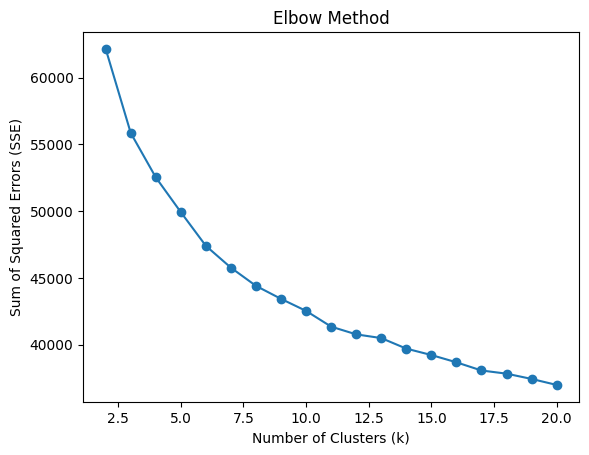

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('/content/drive/MyDrive/output.csv')

# Extract the embeddings
embeddings = data.iloc[:, 1:].values

# Initialize a list for storing SSE values
sse = []

# Perform clustering for k between 2 and 20
for k in range(2, 21):
    # Initialize KMeans with the current value of k
    kmeans = KMeans(n_clusters=k)
    # Fit the embeddings to the model
    kmeans.fit(embeddings)
    # Append the SSE value to the list
    sse.append(kmeans.inertia_)

# Plot SSE values
plt.plot(range(2, 21), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

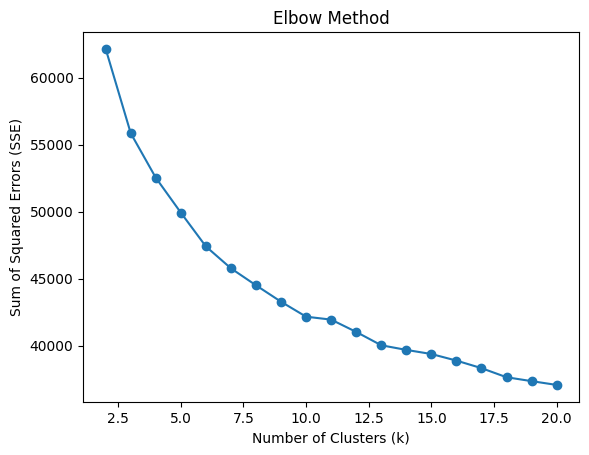

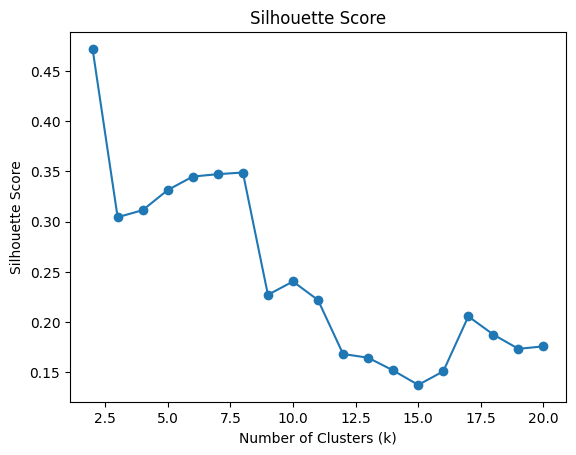

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('/content/drive/MyDrive/output.csv')

# Extract the embeddings
embeddings = data.iloc[:, 1:].values

# Initialize lists for storing SSE and Silhouette scores
sse = []
silhouette_scores = []

# Perform clustering for k between 2 and 20
for k in range(2, 21):
    # Initialize KMeans with the current value of k
    kmeans = KMeans(n_clusters=k)
    # Fit the embeddings to the model
    kmeans.fit(embeddings)
    # Append the SSE value to the list
    sse.append(kmeans.inertia_)
    # Calculate the Silhouette score and append it to the list
    silhouette_scores.append(silhouette_score(embeddings, kmeans.labels_))

# Plot SSE values
plt.plot(range(2, 21), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

# Plot Silhouette scores
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


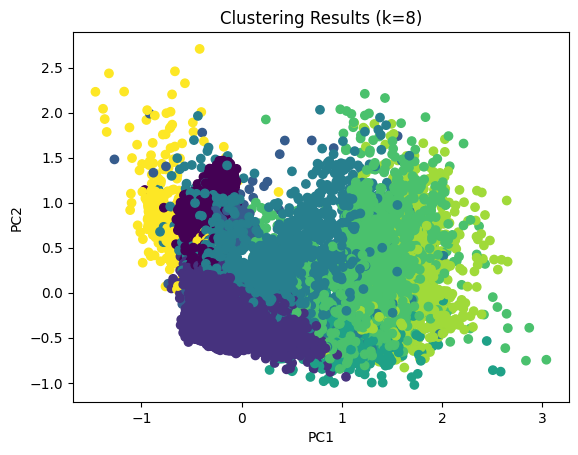

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('/content/drive/MyDrive/output.csv')

# Extract the embeddings
embeddings = data.iloc[:, 1:].values

# Perform clustering with k=8
kmeans = KMeans(n_clusters=8)
cluster_labels = kmeans.fit_predict(embeddings)

# Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the clustering results on a 2D plot
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=cluster_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering Results (k=8)')
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Read the CSV file
#data = pd.read_csv('/content/drive/MyDrive/output.csv')

# Extract the embeddings
embeddings = data.iloc[:, 1:].values

# Perform clustering with k=15
kmeans = KMeans(n_clusters=15)
cluster_labels = kmeans.fit_predict(embeddings)

# Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)



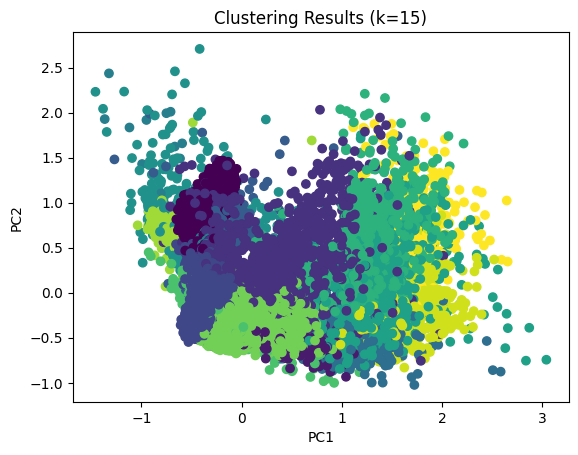

In [ ]:
# Plot the clustering results on a 2D plot
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=cluster_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering Results (k=15)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


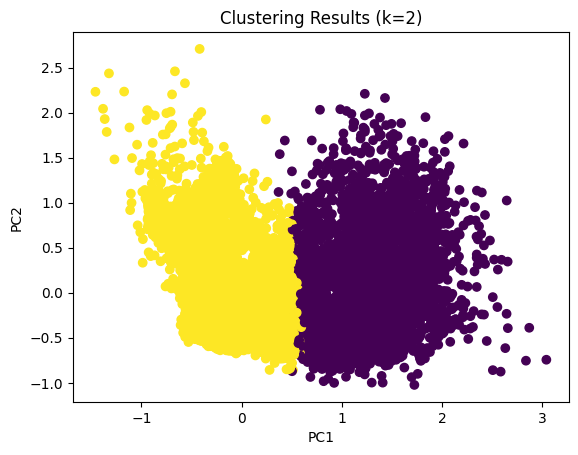

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Read the CSV file
#data = pd.read_csv('/content/drive/MyDrive/output.csv')

# Extract the embeddings
embeddings = data.iloc[:, 1:].values

# Perform clustering with k=2
kmeans = KMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(embeddings)

# Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the clustering results on a 2D plot
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=cluster_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering Results (k=2)')
plt.show()

In [ ]:
data = data.rename(columns={data.columns[0]: 'embedding'})
data.head()

,embedding,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,of,-0.409769,0.886151,0.182495,-0.627666,0.593140,0.551254,-1.066917,0.045021,-0.633604,...,0.366269,0.172051,1.175107,-0.431167,0.743886,-0.680531,0.223744,0.241587,0.398160,-0.058854
1,type,-0.736679,0.565664,0.254811,-1.107001,0.791414,0.929359,-1.526802,0.268393,-0.633156,...,0.396563,-0.032871,1.323189,-0.521881,0.518183,-0.362549,0.372880,0.398472,0.155066,0.006514
2,pizza,-0.010809,1.176755,0.279866,-0.738134,0.162676,0.454871,-1.010887,0.155637,-0.410701,...,0.375989,-0.260217,0.780505,-0.648357,1.106418,-0.599670,0.014686,0.350252,0.152177,-0.076184
3,http://www.semanticweb.org/owl2vec#typeOf,0.610288,0.142879,-0.769991,0.828864,-0.039205,-0.181105,-0.913990,-0.006495,-0.067474,...,0.672256,-0.565384,0.238724,-0.169693,0.932245,0.612588,0.122182,1.190319,-0.724575,-0.436486
4,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,0.656674,-0.136439,-1.050983,1.159625,-0.121700,0.046027,-0.987411,-0.044839,0.084513,...,0.417528,0.014978,0.607546,-0.195661,0.697807,0.136749,-0.026572,1.271083,-0.139468,-0.693450


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame

# Define a function to retrieve the embedding for a given entity
def get_embedding(entity):
    embedding = data[data['embedding'] == entity].values[:, 1:].flatten()
    if len(embedding) > 0:
        return embedding
    else:
        return None

# Test the function
entity_name = 'margherita'
embedding = get_embedding(entity_name)

if embedding is not None:
    print(f"Embedding found for entity '{entity_name}': {embedding}")
else:
    print(f"No embedding found for entity '{entity_name}'")

Embedding found for entity 'margherita': [-0.90330523 0.7394789 0.47412163 0.18838903 -0.21315785 1.1000587
 -0.48671755 0.7067824 -0.043227013 0.30160412 0.036673274 0.35353392
 -0.29591385 -0.21899311 0.1859529 -0.38629165 -0.41257676 -0.9830062
 0.39107108 0.5008457 -0.7510905 -0.06974218 -0.07735316 1.1725054
 0.022743857 0.44085312 -0.14182943 0.7527927 0.587256 -0.62579453
 -1.2131273 -0.15273029 -0.15025403 0.73014224 0.8381575 -1.5932864
 0.20112906 -0.329726 -0.13647959 0.0157611 -0.058285628 0.97453094
 0.35404804 -0.8270246 0.57804364 1.0531812 -0.46110415 1.2081242
 0.8465455 -0.18759419 0.654666 -0.3338666 -1.7238941 0.033202678
 0.7806755 0.047036797 0.16589133 0.2651749 -0.6556322 0.48066208
 0.27154422 0.36355433 -0.385655 0.51798004 0.2425503 -0.023876999
 -0.328722 0.38064495 0.36833328 -0.36140448 0.93799907 -0.28579277
 -0.12850584 -0.21987931 -0.19258536 -0.22911851 -0.23532604 -0.9262261
 -0.2037161 -0.07810496 0.30178446 -0.21756153 -0.098129354 -0.28979632
 -0.5

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame

# Define a function to return keys that include a given string
def get_keys_with_string(search_string):
    keys_with_string = data[data['embedding'].str.contains(search_string, case=False)]
    return keys_with_string['embedding'].tolist()

# Test the function
search_string = 'US'
keys_with_string = get_keys_with_string(search_string)

if len(keys_with_string) > 0:
    print(f"Keys including the string '{search_string}':")
    for key in keys_with_string:
        print(key)
else:
    print(f"No keys found including the string '{search_string}'")

Keys including the string 'US':
USD
usd
us
http://dbpedia.org/resource/US
brio%20tuscan%20grille%20
louie%27s%20famous%20pizza
mellow%20mushroom%20pizza%20bakers
mellow%20mushroom%20
bulldog%20ale%20house%20
%20thousand%20oaks
mushrooms,
sausage%20onion%20jam%20pizza
johnny%20brusco%20pizza
johnny%27s%20pizza%20house
crust
sausage,
southend%20brewery%20%26%20smokehouse
mellow%20mushroom
sushi%20pizza
austin%27s%20pizza
river%20house%20bar%20%26%20grill
fred%27s%20rivertown%20alehouse
custom%20pie
%20willys%20public%20house%20and%20eatery
taphouse%2015
the%20boarding%20house
famous%20pizza%20of%20west%20warwick
http://www.city.ac.uk/ds/inm713/hadi_ghasemi/food_store/Mellow%20Mushroom%20Pizza%20Bakers
tutti%20gusti
sausage
http://www.city.ac.uk/ds/inm713/hadi_ghasemi/food_store/Louie%27s%20Famous%20Pizza
http://www.city.ac.uk/ds/inm713/hadi_ghasemi/pizza_type/crust
nordstrom%20the%20plaza%20at%20king%20of%20prussia
ruscello%20
mushroom
blondie%27s%20firehouse%20pub
thin%20crust%20pizza
t

In [ ]:
import pandas as pd
from scipy.spatial.distance import cosine

# Read the CSV file into a DataFrame

# Define the pairs of entities you want to compare
entity_pairs = [
    ('margherita', 'pizza'),
    ('margherita', 'http://www.city.ac.uk/ds/inm713/hadi_ghasemi/pizza_type/margherita'),
    ('margherita', 'pizza margherita'),
    ('margherita', 'bianca'),
    ('margherita', 'US'),
    ('margherita','http://dbpedia.org/resource/US'),
    ('http://dbpedia.org/resource/US', 'US'),


]

# Iterate over the pairs of entities
for pair in entity_pairs:
    entity1, entity2 = pair

    # Extract the vectors for the entities
    vector1 = data[data['embedding'] == entity1].values[:, 1:].flatten()
    vector2 = data[data['embedding'] == entity2].values[:, 1:].flatten()

    # Calculate the cosine similarity between the vectors
    similarity_score = 1 - cosine(vector1, vector2)

    # Print the similarity score
    print(f"Similarity between {entity1} and {entity2}: {similarity_score}")

Similarity between margherita and pizza: 0.5790514051961504
Similarity between margherita and http://www.city.ac.uk/ds/inm713/hadi_ghasemi/pizza_type/margherita: 0.3179901843147217
Similarity between margherita and pizza margherita: 0.7940730842662989
Similarity between margherita and bianca: 0.6125173372546684
Similarity between margherita and US: 0.38876724626378323
Similarity between margherita and http://dbpedia.org/resource/US: 0.28827882378274783
Similarity between http://dbpedia.org/resource/US and US: 0.43053579612827253


In [ ]:
# Test the function
entity_name = 'http://www.city.ac.uk/ds/inm713/hadi_ghasemi/pizza_type/margherita'
embedding = get_embedding(entity_name)

if embedding is not None:
    print(f"Embedding found for entity '{entity_name}': {embedding}")
else:
    print(f"No embedding found for entity '{entity_name}'")

Embedding found for entity 'http://www.city.ac.uk/ds/inm713/hadi_ghasemi/pizza_type/margherita': [0.002185421 -0.69867486 -1.3311447 1.0740854 -0.007635823 -0.18292688
 -0.99322754 0.35173795 0.24342537 0.21575028 -0.10712048 0.52698314
 -0.113644436 0.594556 -0.47903514 0.0024799537 -0.41484413 -0.75180286
 -0.34945825 0.42536336 -0.26746014 0.11175962 0.24339087 1.1125425
 -0.039544113 -0.00028989522 -0.12847298 0.44738427 0.46079332 0.39386198
 0.050278552 0.16589282 -0.2728623 0.7344415 0.78032416 -0.9580098
 0.724796 -0.6959314 -1.007071 -0.003151602 0.11975696 0.80089396
 0.7002867 -0.60968125 0.873632 -0.3886309 0.63623494 0.10535488
 0.30221415 -0.18667845 -0.48342642 -1.1877892 -0.31630474 -0.44608605
 0.19589162 0.049703233 -0.46780756 0.6180284 -0.40065965 0.03480072
 -0.3002782 0.355755 -0.19326288 0.7651957 -0.4765681 0.0356085 0.44141346
 0.45478377 -0.029896796 -0.9131536 0.35819072 0.4325591 -0.58239543
 -0.30963314 0.36384422 0.7705927 0.8107347 0.48466682 -0.22825673


In [ ]:
!pip install rdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
from rdflib import Graph, URIRef, Literal
from rdflib.plugins.sparql import prepareQuery

# Create an RDF graph
g = Graph()
g.parse("/content/1.owl", format="xml")


<Graph identifier=N91006e660cb4428c8bdff707441d812a (<class 'rdflib.graph.Graph'>)>

In [ ]:
G=Graph()
G.parse("https://protege.stanford.edu/ontologies/pizza/pizza.owl", format="xml")

<Graph identifier=Ne585dc2fe8434a7cb803d24e811660ea (<class 'rdflib.graph.Graph'>)>

In [ ]:
G.serialize(format='turtle')

'@prefix : <http://www.co-ode.org/ontologies/pizza/pizza.owl#> .\n@prefix dc: <http://purl.org/dc/elements/1.1/> .\n@prefix dcterms: <http://purl.org/dc/terms/> .\n@prefix owl: <http://www.w3.org/2002/07/owl#> .\n@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .\n@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .\n@prefix skos: <http://www.w3.org/2004/02/skos/core#> .\n@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .\n\ndc:description a owl:AnnotationProperty .\n\ndc:title a owl:AnnotationProperty .\n\ndcterms:contributor a owl:AnnotationProperty .\n\ndcterms:license a owl:AnnotationProperty .\n\ndcterms:provenance a owl:AnnotationProperty .\n\n<http://www.co-ode.org/ontologies/pizza> a owl:Ontology ;\n    rdfs:label "pizza"^^xsd:string ;\n    dc:description """An ontology about pizzas and their toppings.\n\nThis is an example ontology that contains all constructs required for the various versions of the Pizza Tutorial run by Manchester University (see http://owl.cs.m

In [ ]:
from rdflib import Graph, Namespace

# Load the ontology into an RDF graph
# Get the namespaces from the graph
namespaces = G.namespaces()

# Print the defined namespaces
for prefix, uri in namespaces:
    print(f"Prefix: {prefix}, URI: {uri}")

Prefix: brick, URI: https://brickschema.org/schema/Brick#
Prefix: csvw, URI: http://www.w3.org/ns/csvw#
Prefix: dc, URI: http://purl.org/dc/elements/1.1/
Prefix: dcat, URI: http://www.w3.org/ns/dcat#
Prefix: dcmitype, URI: http://purl.org/dc/dcmitype/
Prefix: dcterms, URI: http://purl.org/dc/terms/
Prefix: dcam, URI: http://purl.org/dc/dcam/
Prefix: doap, URI: http://usefulinc.com/ns/doap#
Prefix: foaf, URI: http://xmlns.com/foaf/0.1/
Prefix: geo, URI: http://www.opengis.net/ont/geosparql#
Prefix: odrl, URI: http://www.w3.org/ns/odrl/2/
Prefix: org, URI: http://www.w3.org/ns/org#
Prefix: prof, URI: http://www.w3.org/ns/dx/prof/
Prefix: prov, URI: http://www.w3.org/ns/prov#
Prefix: qb, URI: http://purl.org/linked-data/cube#
Prefix: schema, URI: https://schema.org/
Prefix: sh, URI: http://www.w3.org/ns/shacl#
Prefix: skos, URI: http://www.w3.org/2004/02/skos/core#
Prefix: sosa, URI: http://www.w3.org/ns/sosa/
Prefix: ssn, URI: http://www.w3.org/ns/ssn/
Prefix: time, URI: http://www.w3.or

In [ ]:
from rdflib import Graph, Namespace

# Load the ontology into an RDF graph
g = Graph()
g.parse("your_ontology.owl", format="xml")  # Replace "your_ontology.owl" with the path to your ontology file

# Get the namespaces from the graph
namespaces = g.namespaces()

# Print the defined namespaces
for prefix, uri in namespaces:
    print(f"Prefix: {prefix}, URI: {uri}")

Prefix: brick, URI: https://brickschema.org/schema/Brick#
Prefix: csvw, URI: http://www.w3.org/ns/csvw#
Prefix: dc, URI: http://purl.org/dc/elements/1.1/
Prefix: dcat, URI: http://www.w3.org/ns/dcat#
Prefix: dcmitype, URI: http://purl.org/dc/dcmitype/
Prefix: dcterms, URI: http://purl.org/dc/terms/
Prefix: dcam, URI: http://purl.org/dc/dcam/
Prefix: doap, URI: http://usefulinc.com/ns/doap#
Prefix: foaf, URI: http://xmlns.com/foaf/0.1/
Prefix: geo, URI: http://www.opengis.net/ont/geosparql#
Prefix: odrl, URI: http://www.w3.org/ns/odrl/2/
Prefix: org, URI: http://www.w3.org/ns/org#
Prefix: prof, URI: http://www.w3.org/ns/dx/prof/
Prefix: prov, URI: http://www.w3.org/ns/prov#
Prefix: qb, URI: http://purl.org/linked-data/cube#
Prefix: schema, URI: https://schema.org/
Prefix: sh, URI: http://www.w3.org/ns/shacl#
Prefix: skos, URI: http://www.w3.org/2004/02/skos/core#
Prefix: sosa, URI: http://www.w3.org/ns/sosa/
Prefix: ssn, URI: http://www.w3.org/ns/ssn/
Prefix: time, URI: http://www.w3.or